# **Youth Tobacco Survey (YTS) Data**

**Libraries**

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

**Preferences**

In [2]:
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', font='serif')

DATASETURL = 'https://raw.githubusercontent.com/Jerald011003/Tobaco-Analysis/refs/heads/main/datasets/Youth_Tobacco_Survey__YTS__Data.csv'

# **I. Exploratory Data Analysis**

In [3]:
data = pd.read_csv(DATASETURL)

data.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,10600.0,2007.053491,5.462656,1999.0,2002.0,2006.00,2011.000,2017.0
Data_Value,10080.0,20.336806,21.168271,0.0,3.0,10.55,36.425,98.0
Data_Value_Std_Err,10080.0,1.851429,1.777441,0.0,0.6,1.30,2.400,16.1
Low_Confidence_Limit,10083.0,16.715253,18.575128,0.0,1.7,7.90,29.600,97.6
High_Confidence_Limit,10080.0,23.961806,23.981915,0.0,4.3,13.20,42.500,98.4
Sample_Size,10080.0,1483.412897,2189.565233,50.0,671.0,1001.00,1642.000,36910.0
DisplayOrder,10600.0,8.106887,3.076806,1.0,7.0,9.00,11.000,12.0


In [6]:
data.columns
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include='object').columns

In [7]:
print(f'Numerical Columns\n{num_cols}\n')
print(f'Categorical Columns\n{cat_cols}')

Numerical Columns
Index(['YEAR', 'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'DisplayOrder'],
      dtype='object')

Categorical Columns
Index(['LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc',
       'DataSource', 'Response', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Gender', 'Race',
       'Age', 'Education', 'GeoLocation', 'TopicTypeId', 'TopicId',
       'MeasureId', 'StratificationID1', 'StratificationID2',
       'StratificationID3', 'StratificationID4', 'SubMeasureID'],
      dtype='object')


# **II. Data Cleaning and Preprocessing**

In [8]:
# Summation of missing values
data.isnull().sum()

,0
YEAR,0
LocationAbbr,0
LocationDesc,0
TopicType,0
TopicDesc,0
MeasureDesc,0
DataSource,0
Response,2410
Data_Value_Unit,0
Data_Value_Type,0


In [9]:
# No. of duplications
data.duplicated().sum()

0

In [10]:
irrelevant_columns = [
    'TopicTypeId', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit',
    'Sample_Size', 'GeoLocation'
]

data_cleaned = data.drop(columns=irrelevant_columns)

data_cleaned.columns = data_cleaned.columns.str.strip()

data_cleaned = data_cleaned.dropna(subset=[col for col in ['Low_Confidence_Limit', 'High_Confidence_Limit'] if col in data_cleaned.columns])


In [11]:
# Fill missing values in categorical columns with 'True'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(True)

# Fill missing values in numeric columns with the column mean
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())


In [12]:
print("\nMissing values after cleaning:")
data_cleaned.isnull().sum()


Missing values after cleaning:


,0
YEAR,0
LocationAbbr,0
LocationDesc,0
TopicType,0
TopicDesc,0
MeasureDesc,0
DataSource,0
Response,0
Data_Value_Unit,0
Data_Value_Type,0


In [13]:
data_cleaned.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Age,Education,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,All Ages,Middle School,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,All Ages,High School,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,All Ages,High School,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,All Ages,Middle School,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,All Ages,High School,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [14]:
num_cols = data_cleaned.select_dtypes(include=np.number).columns
cat_cols = data_cleaned.select_dtypes(include='object').columns

print(f'Numerical Columns\n{num_cols}\n')
print(f'Categorical Columns\n{cat_cols}')

Numerical Columns
Index(['YEAR', 'Data_Value', 'DisplayOrder'], dtype='object')

Categorical Columns
Index(['LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc',
       'DataSource', 'Response', 'Data_Value_Unit', 'Data_Value_Type',
       'Gender', 'Race', 'Age', 'Education', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID'],
      dtype='object')


# III. Data Visualization

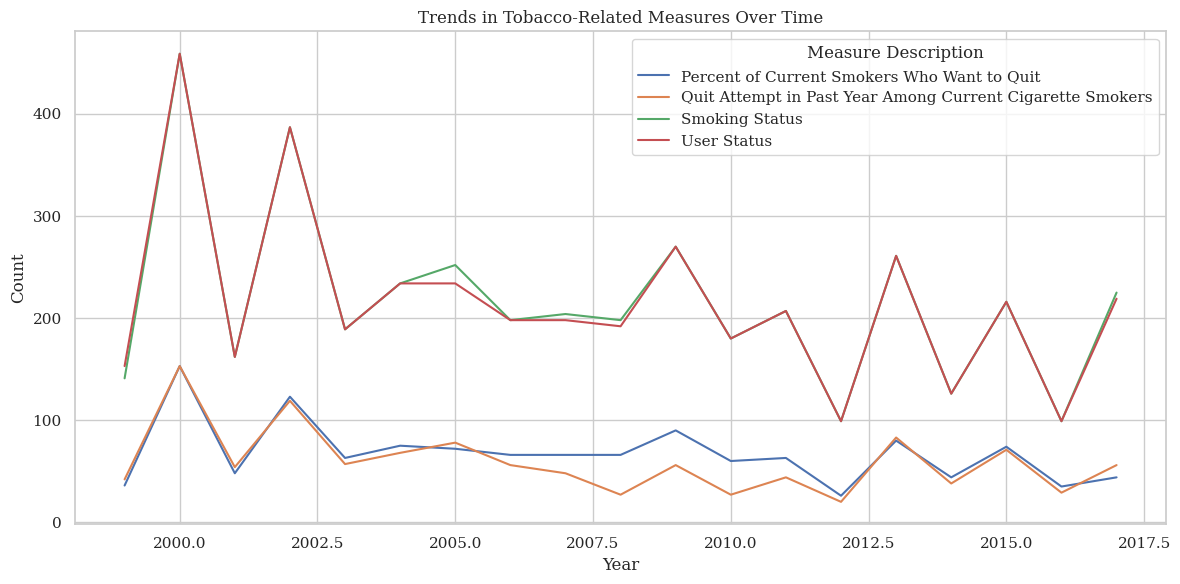

In [15]:
# Visualization 1: Trend of Tobacco-Related Measures Over Time (Line Chart)
plt.figure(figsize=(12, 6))
measure_trend = data_cleaned.groupby(['YEAR', 'MeasureDesc']).size().unstack().fillna(0)
measure_trend.plot(kind='line', ax=plt.gca())
plt.title("Trends in Tobacco-Related Measures Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Measure Description")
plt.tight_layout()
plt.show()

Trends in Tobacco-Related Measures Over Time (Line Chart)
* This line chart illustrates changes in tobacco-related measures (e.g., "Smoking Status," "User Status") across the years. The lines for each measure help reveal patterns or shifts over time, indicating trends in smoking behaviors or tobacco use within the population.

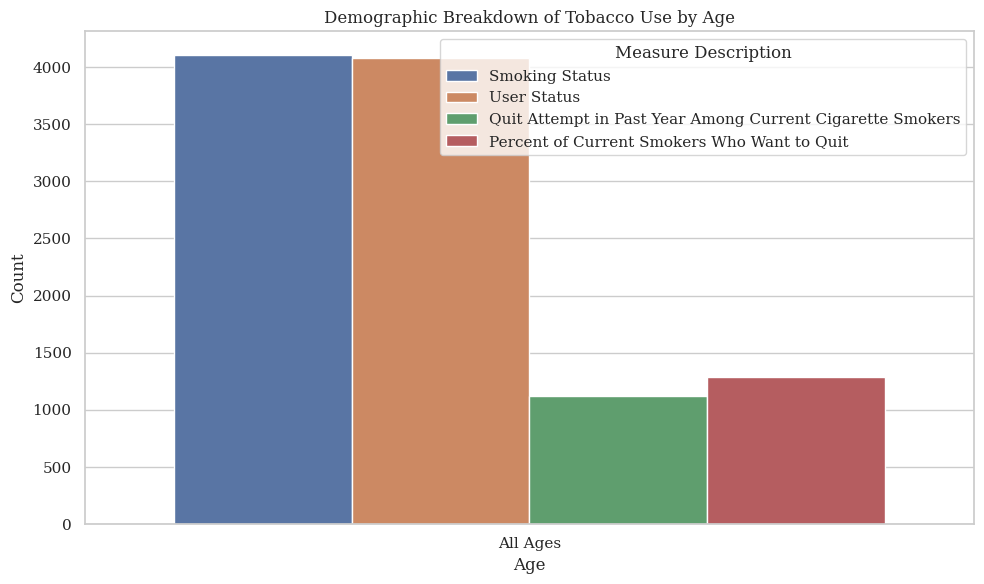

In [40]:
# Visualization 1: Breakdown of Tobacco Use by Age
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Age', hue='MeasureDesc')
plt.title("Demographic Breakdown of Tobacco Use by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Measure Description")
plt.tight_layout()
plt.show()


Demographic Breakdown of Tobacco Use by Age (Bar Plot)
* This bar plot illustrates the demographic breakdown of tobacco use across different age groups. The x-axis represents various age categories, while the y-axis indicates the count of tobacco-related measures for each age group. Each bar is color-coded according to different measure descriptions, providing insights into how tobacco use varies among various demographics. The legend clarifies which measure corresponds to each color, enabling viewers to quickly understand the distribution and prevalence of tobacco use across ages.

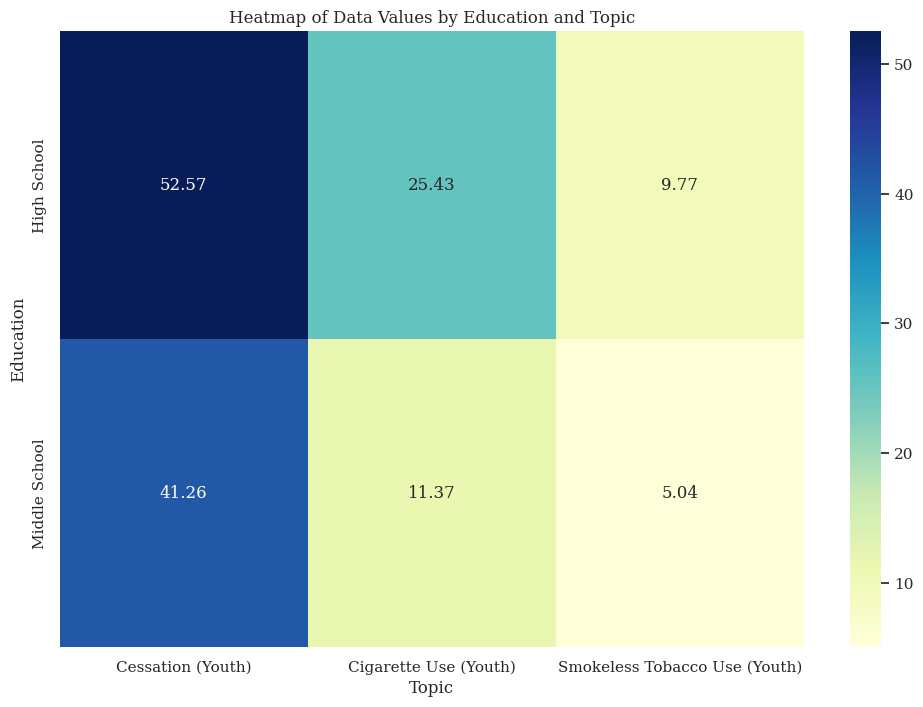

In [29]:
# Visualization 3: Heatmap of Data Values by Education and Topic (Heatmap)

pivot_table = data_cleaned.pivot_table(
    index='Education',
    columns='TopicDesc',
    values='Data_Value',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Data Values by Education and Topic')
plt.xlabel('Topic')
plt.ylabel('Education')
plt.show()

Heatmap of Data Values by Education and Topic (Heatmap)

*   This heatmap illustrates the relationship between educational attainment and various tobacco-related measures across different topics. Each cell's color intensity indicates the average value of the tobacco-related measures for each educational level, allowing for a clear visualization of how education influences awareness and engagement with tobacco-related issues.


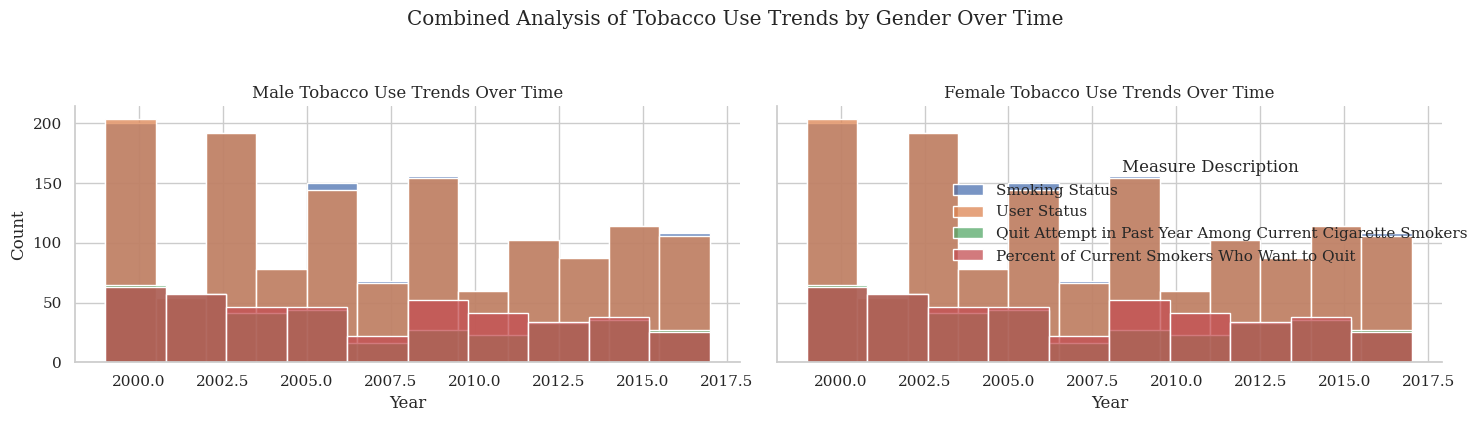

In [18]:
# Visualization 4: Year and Demographic Combined Analysis (Facet Grid)

g = sns.FacetGrid(data_cleaned, col='Gender', hue='MeasureDesc', height=4, aspect=1.2, col_order=['Male', 'Female'])
g.map_dataframe(sns.histplot, x='YEAR', multiple='stack')
g.add_legend(title="Measure Description")
g.set_axis_labels("Year", "Count")
g.set_titles("{col_name} Tobacco Use Trends Over Time")
plt.suptitle("Combined Analysis of Tobacco Use Trends by Gender Over Time", y=1.05)
plt.tight_layout()
plt.show()

Combined Analysis of Tobacco Use Trends by Gender Over Time (Facet Grid)


*   This facet grid shows tobacco use trends over time, with separate histograms for each gender. Each subplot represents either male or female, and the stacked bars show the annual distribution for each tobacco measure. This view combines gender and time trends, revealing any notable differences in smoking-related behaviors across genders over the years.


# **IV. Model Development**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop specified columns
columns_to_drop = [
    "YEAR", "LocationAbbr", "LocationDesc", "DataSource",
    "TopicType", "Data_Value_Type", "Gender", "StratificationID2",
    "StratificationID3", "Data_Value_Unit"
]
data_filtered = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

for col in data_filtered.columns:
    if data_filtered[col].dtype == 'bool':
        data_filtered[col] = data_filtered[col].astype(int)
    elif data_filtered[col].dtype == 'object':
        data_filtered[col] = data_filtered[col].astype(str)

label_encoders = {col: LabelEncoder() for col in data_filtered.select_dtypes(include='object').columns}
for col, le in label_encoders.items():
    data_filtered[col] = le.fit_transform(data_filtered[col])


X = data_filtered.drop(columns="Response")
y = data_filtered["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_performance[name] = {"Accuracy": accuracy, "Classification Report": report}

model_performance


{'Logistic Regression': {'Accuracy': 1.0,
  'Classification Report': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 554.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562.0},
   '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 516.0},
   '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 488.0},
   'accuracy': 1.0,
   'macro avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 2120.0},
   'weighted avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 2120.0}}},
 'Support Vector Machine': {'Accuracy': 1.0,
  'Classification Report': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 554.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562.0},
   '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 516.0},
   '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 

# **V. Model Evaluation**

In [20]:
model_performance = {}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report, y_pred

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    accuracy, report, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

    model_performance[name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    if accuracy < 0.85:
        print(f"{name} did not meet the accuracy threshold. Tuning hyperparameters...")

        if name == "Random Forest":
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            accuracy, report, y_pred = evaluate_model(best_model, X_train, y_train, X_test, y_test)

            model_performance[name] = {
                "Accuracy": accuracy,
                "Classification Report": report,
                "Confusion Matrix": confusion_matrix(y_test, y_pred)
            }

for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']* 100:.2f}%")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("-" * 40)


Model: Logistic Regression
Accuracy: 100.00%
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 554.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 516.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 488.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2120.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2120.0}}
Confusion Matrix:
[[554   0   0   0]
 [  0 562   0   0]
 [  0   0 516   0]
 [  0   0   0 488]]
----------------------------------------
Model: Support Vector Machine
Accuracy: 100.00%
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 554.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 516.0}, '3': {'pre